In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd

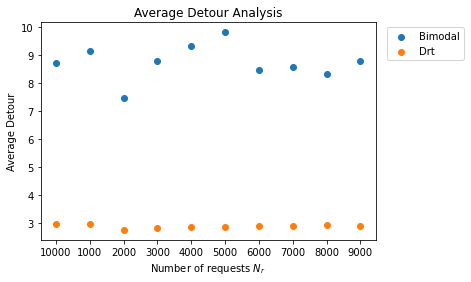

In [27]:
directory_bim = "/home/helge/Programs/matsim/matsim_results/24h_drt_1percent-bim_19102020/"
directory_drt = "/home/helge/Programs/matsim/matsim_results/24h_drt_1percent-drts_19102020/"

def getDetours(directory):
    reqs = []
    average_detours = []
    
    for root, subdirs, files in os.walk(directory):
        for file in files:
            if file == '0.drt_detours_drt.csv':
                request = re.match(".*/(\d*)reqs/.*", root)
                reqs.append(request.group(1))
                df = pd.read_csv(os.path.join(root, file), sep=';')
                average_detours.append(df['timeDetour'].mean())
    
    return np.array(reqs), np.array(average_detours)
 

reqs_drt, av_detours_drt = getDetours(directory_drt)
reqs_bim, av_detours_bim = getDetours(directory_bim)

plt.scatter(reqs_bim, av_detours_bim, label=r"Bimodal")
plt.scatter(reqs_drt, av_detours_drt, label=r"Drt")
plt.xlabel(r"Number of requests $N_r$")
plt.ylabel(r"Average Detour")
plt.title('Average Detour Analysis')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
# plt.savefig("AverageDetour.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()